In this first task, data cleaning is perfromed by identifying and removing missing values and outliers.
The dataset used in this task is the Titanic dataset from Kaggle.
The titanic dataset is grouped into 2, test and train.


## Dataset:
@misc{titanic,
    author = {Will Cukierski},
    title = {Titanic - Machine Learning from Disaster},
    publisher = {Kaggle},
    year = {2012},
    url = {https://kaggle.com/competitions/titanic}
}

# TRAIN DATA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
train_df = pd.read_csv('train.csv')
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
train_df.shape

(891, 12)

In [4]:
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## identifying missing values

In [5]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## dealing with the missing values

In [6]:
# replacing all the missing values (NaN) in the 'Age' column of the train DataFrame with the median age
train_df['Age'].fillna(train_df['Age'].median, inplace=True)

# removing all the rows in the train DataFrame where the 'Embarked' value is missing
train_df.dropna(subset=['Embarked'], inplace=True)

# removing the 'Cabin' column from the train DataFrame due to the size of the empty rows
train_df.drop(columns= ['Cabin'], inplace=True)
train_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## identifying outliers using boxplot

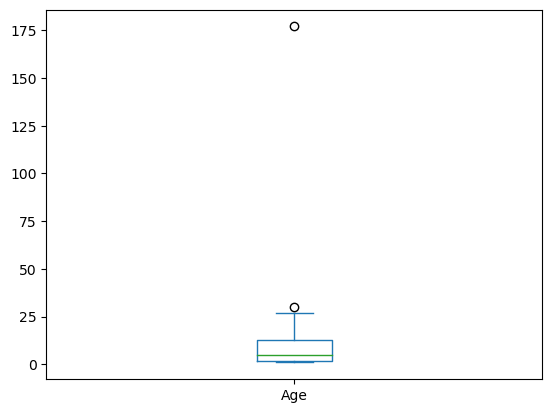

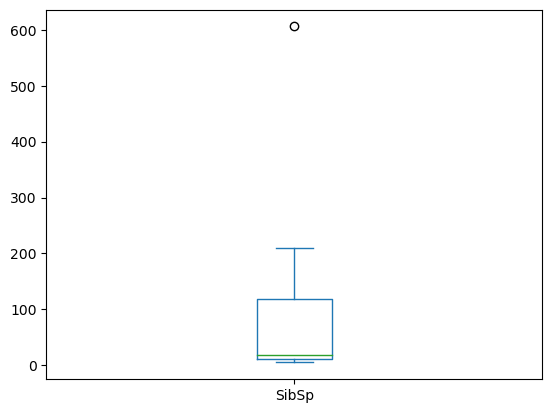

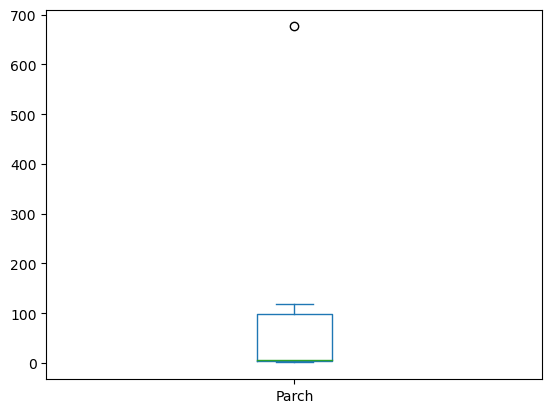

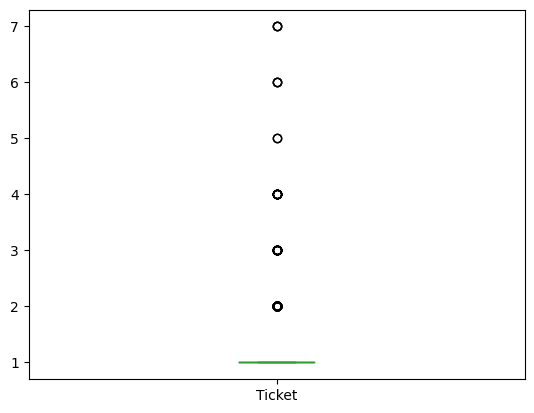

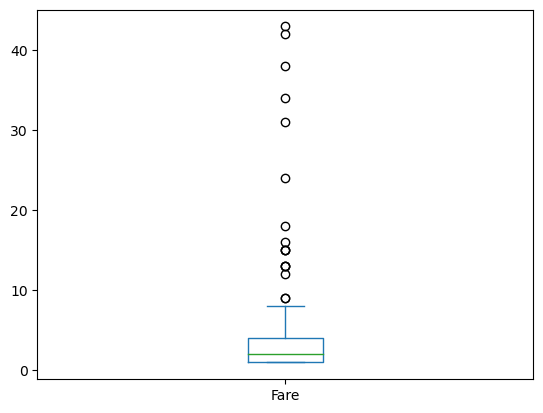

In [7]:
train_df['Age'].value_counts().plot(kind='box')
plt.show()
train_df['SibSp'].value_counts().plot(kind='box')
plt.show()
train_df['Parch'].value_counts().plot(kind='box')
plt.show()
train_df['Ticket'].value_counts().plot(kind='box')
plt.show()
train_df['Fare'].value_counts().plot(kind='box')
plt.show()

##  removing outliers using IQR method

In [8]:
Q1 = train_df['Fare'].quantile(0.25)
Q3 = train_df['Fare'].quantile(0.75)
IQR1 = Q3-Q1

In [9]:
Q1, Q3, IQR1

(7.8958, 31.0, 23.1042)

In [10]:
lower_limit = Q1 - (1.5*IQR1)
upper_limit = Q3 + (1.5*IQR1)

lower_limit, upper_limit

(-26.7605, 65.6563)

In [12]:
# trimmimg the data (deleting the outlier data)
new_train_df = train_df.loc[(train_df['Fare'] < upper_limit) & (train_df['Fare'] > lower_limit)]
print('before removing outliers: ', len(train_df))
print('after removing outliers: ', len(new_train_df))
print('outliers: ', len(train_df) - len(new_train_df))

before removing outliers:  889
after removing outliers:  775
outliers:  114


<Axes: >

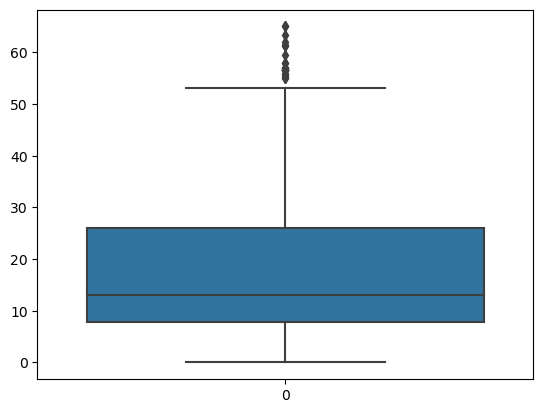

In [13]:
sns.boxplot(new_train_df['Fare'])

In [14]:
# capping - changing the outlier values to upper (or) lower limit values
new_train_df = train_df.copy()
new_train_df.loc[(new_train_df['Fare'] > upper_limit), 'Fare'] = upper_limit
new_train_df.loc[(new_train_df['Fare'] < lower_limit), 'Fare'] = lower_limit

<Axes: >

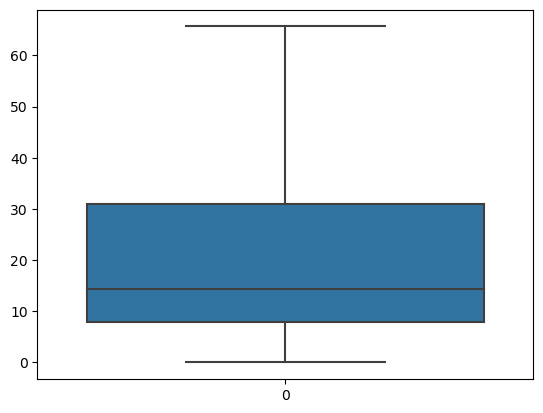

In [15]:
sns.boxplot(new_train_df['Fare'])

# TEST DATA

In [16]:
test = pd.read_csv('test.csv')
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [17]:
test.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## identifying missing values

In [18]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## dealing with the missing values

In [19]:
# replacing all the missing values (NaN) in the 'Age' column with the median age
test['Age'].fillna(test['Age'].median(), inplace = True)

# removing all the rows in the test DataFrame where the 'Fare' value is missing
test.dropna(subset=['Fare'], inplace = True)

# removing the 'Cabin' column from the test DataFrame due to the size of the empty rows
test.drop(columns=['Cabin'], inplace = True)
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## identifying outliers using boxplot

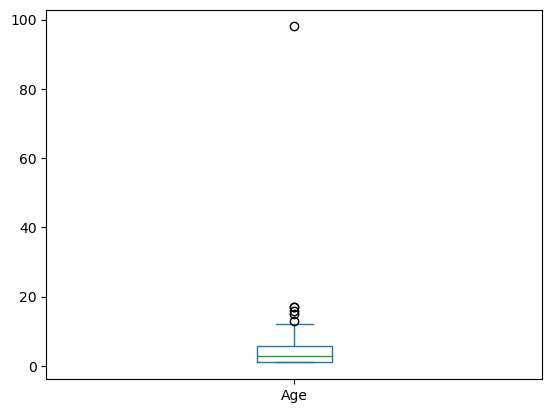

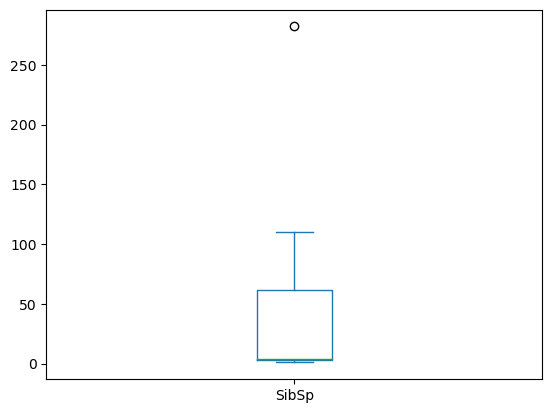

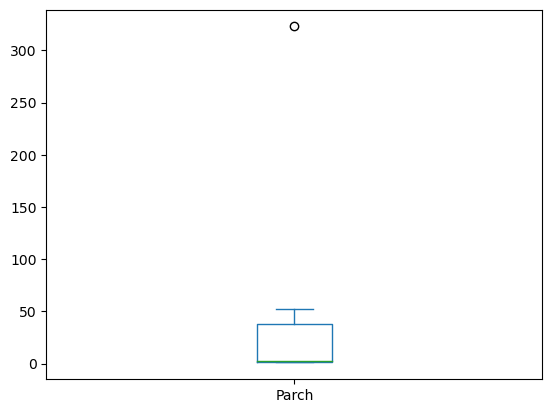

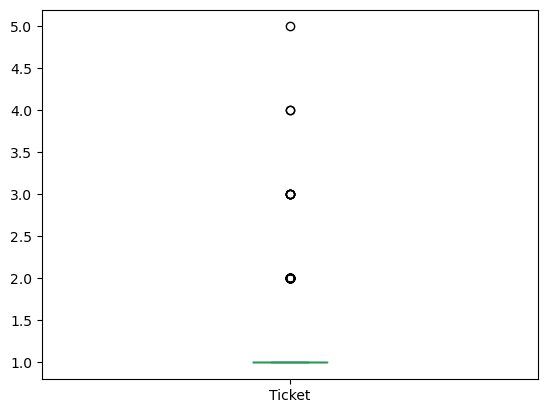

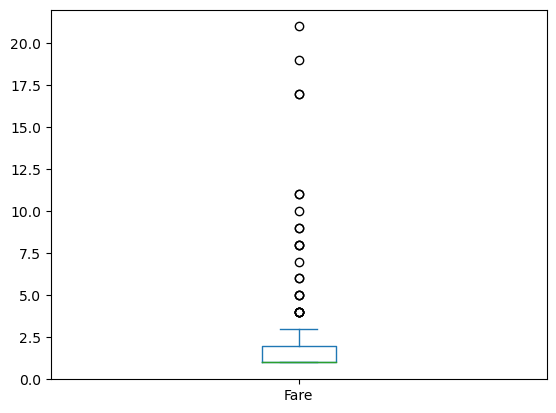

In [20]:
test['Age'].value_counts().plot(kind='box')
plt.show()
test['SibSp'].value_counts().plot(kind='box')
plt.show()
test['Parch'].value_counts().plot(kind='box')
plt.show()
test['Ticket'].value_counts().plot(kind='box')
plt.show()
test['Fare'].value_counts().plot(kind='box')
plt.show()

## removing outliers using IQR method

In [21]:
q1 = test['Fare'].quantile(0.25)
q3 = test['Fare'].quantile(0.75)
iqr = q3-q1

In [22]:
q1, q3, iqr

(7.8958, 31.5, 23.6042)

In [23]:
lower_limit = q1 - (1.5*iqr)
upper_limit = q3 + (1.5*iqr)
                    
lower_limit, upper_limit

(-27.5105, 66.9063)

In [24]:
# finding the outliers 
test.loc[(test['Fare'] > upper_limit) | (test['Fare'] < lower_limit)]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
12,904,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",female,23.0,1,0,21228,82.2667,S
24,916,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",female,48.0,1,3,PC 17608,262.3750,C
48,940,1,"Bucknell, Mrs. William Robert (Emma Eliza Ward)",female,60.0,0,0,11813,76.2917,C
53,945,1,"Fortune, Miss. Ethel Flora",female,28.0,3,2,19950,263.0000,S
59,951,1,"Chaudanson, Miss. Victorine",female,36.0,0,0,PC 17608,262.3750,C
64,956,1,"Ryerson, Master. John Borie",male,13.0,2,2,PC 17608,262.3750,C
69,961,1,"Fortune, Mrs. Mark (Mary McDougald)",female,60.0,1,4,19950,263.0000,S
74,966,1,"Geiger, Miss. Amalie",female,35.0,0,0,113503,211.5000,C
75,967,1,"Keeping, Mr. Edwin",male,32.5,0,0,113503,211.5000,C
81,973,1,"Straus, Mr. Isidor",male,67.0,1,0,PC 17483,221.7792,S


In [25]:
# trimmimg the data (deleting the outlier data)
new_test = test.loc[(test['Fare'] < upper_limit) & (test['Fare'] > lower_limit)]
print('before removing outliers: ', len(test))
print('after removing outliers: ', len(new_test))
print('outliers: ', len(test) - len(new_test))

before removing outliers:  417
after removing outliers:  362
outliers:  55


<Axes: >

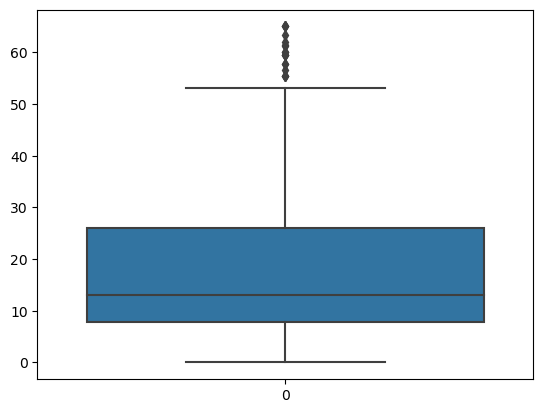

In [26]:
sns.boxplot(new_test['Fare'])

In [27]:
# capping - changing the outlier values to upper limit values
new_test = test.copy()
new_test.loc[(new_test['Fare'] > upper_limit), 'Fare'] = upper_limit
new_test.loc[(new_test['Fare'] < lower_limit), 'Fare'] = lower_limit

<Axes: >

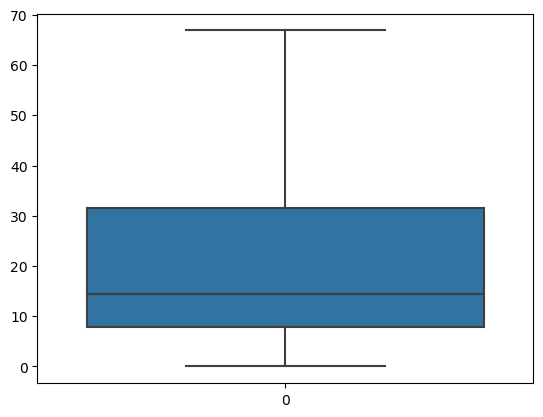

In [29]:
sns.boxplot(new_test['Fare'])